# Cuaderno en el que se van a estudiar las variables del conjunto de datos del dispositivo inercial

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../datasets/original-data/Exported Data_202304231610.csv')
df.head()

,Seconds from Start,Date Time,Speed (km/h),HR (bpm),Core Temperature °C,X accelerometer (Sideways),Y accelerometer (Forward),Z accelerometer (Vertical),Raw RR (ms),Filtered RR (ms),Difference,HR RMSSD,ActivityLoad 2D,ActivityLoad 3D
0,"1,003",[2023-04-23 18:10:38 770],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,101",[2023-04-23 18:10:38 868],NaN,NaN,NaN,"-11,3313","-3,5219","-23,8975",NaN,NaN,NaN,NaN,NaN,NaN
2,"1,104",[2023-04-23 18:10:38 871],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1,110",[2023-04-23 18:10:38 877],NaN,NaN,NaN,"-14,0875","-1,5312","-24,6631",NaN,NaN,NaN,NaN,NaN,NaN
4,"1,120",[2023-04-23 18:10:38 887],NaN,NaN,NaN,"-12,0969","-0,7656","-25,5819",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Seconds from Start             object
Date Time                      object
Speed (km/h)                   object
HR (bpm)                      float64
Core Temperature °C            object
X accelerometer (Sideways)     object
Y accelerometer (Forward)      object
Z accelerometer (Vertical)     object
Raw RR (ms)                   float64
Filtered RR (ms)              float64
Difference                    float64
HR RMSSD                       object
ActivityLoad 2D                object
ActivityLoad 3D                object
dtype: object

### Campo 'Seconds from Start'

In [4]:
df['Seconds from Start'].isnull().any()

False

In [5]:
min_value = df['Seconds from Start'].min()
print(f'Valor mínimo: {min_value} s')

Valor mínimo: 1,003 s


In [6]:
max_value = df['Seconds from Start'].max()
print(f'Valor máximo: {max_value} s')

Valor máximo: 9999,995 s


Todos los registros van informados, representa el segundo en el que se captura el dato

### Campo 'Date Time'

In [14]:
df['Date Time'].isnull().any()

False

Todos los registros van informado, representa la fecha en la que se capturó el dato, en horas, minutos, segundos y milisegundos.

### Campo 'Speed (km/h)'

In [15]:
df['Speed (km/h)'].isnull().any()

True

Existen valores nulos

In [17]:
new_df = df[df['Speed (km/h)'].notnull()][['Seconds from Start','Speed (km/h)']]

In [23]:
def convert_comma_to_point(value):
    if isinstance(value, str):
        return value.replace(',','.')
    return value

In [24]:
column_name = 'Speed (km/h)'
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [25]:
min_value = new_df['Speed (km/h)'].min()
print(f'Valor mínimo {min_value} km/h')

Valor mínimo 0.0 km/h


In [30]:
max_value = new_df['Speed (km/h)'].max()
print(f'Valor máximo {max_value} km/h')

Valor máximo 29.196 km/h


In [36]:
column_name = 'Seconds from Start'
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [39]:
new_df['Seconds from Start'].diff().min()

0.09899999999970532

In [40]:
new_df['Seconds from Start'].diff().max()

0.10100000000056752

In [45]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [47]:
new_df['diff'].min()

0.09899999999970532

In [48]:
new_df['diff'].max()

0.10100000000056752

In [49]:
new_df['diff'].mean()

0.10000000911485629

<AxesSubplot:>

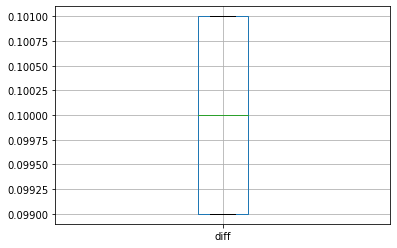

In [46]:
new_df.boxplot('diff')

Representa la velocidad. Se recoge cada 0,1 segundos.

### HR (bpm)

In [68]:
df['HR (bpm)'].isnull().any()

True

Existen valores nulos

In [69]:
new_df = df[df['HR (bpm)'].notnull()][['Seconds from Start','HR (bpm)']]
new_df.head()

,Seconds from Start,HR (bpm)
13739,"126,304",75.0
13795,"126,804",75.0
13853,"127,304",75.0
13908,"127,804",75.0
13962,"128,304",75.0


In [70]:
column_name = 'HR (bpm)'

In [71]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [72]:
min_value = new_df[column_name].min()
print(f'Valor mínimo {min_value} pulsaciones por minuto')

Valor mínimo 53.0 pulsaciones por minuto


In [73]:
max_value = new_df[column_name].max()
print(f'Valor máximo {max_value} pulsaciones por minuto')

Valor máximo 191.0 pulsaciones por minuto


In [75]:
column_name = 'Seconds from Start'
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [76]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [79]:
new_df['diff'].median()

0.5

Representa el ritmo cardíaco. Se captura cada 0,5 segundos.

### Core Temperature ºC

In [83]:
column_name = 'Core Temperature °C'

In [84]:
df[column_name].isnull().any()

True

Hay valores nulos

In [85]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,Core Temperature °C
13356,122.906,"36,9"
13357,122.908,0
20232,184.300,"36,9"
27053,245.468,"36,9"
33913,307.286,"36,9"


In [87]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [88]:
new_df.describe()

,Seconds from Start,Core Temperature °C
count,178.000000,178.000000
mean,5499.099365,37.673034
std,3165.305585,2.883570
min,122.906000,0.000000
25%,2780.026250,37.600000
50%,5498.769000,38.100000
75%,8217.514500,38.300000
max,10936.149000,38.500000


In [89]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [91]:
new_df['diff'].mean()

61.09176836158191

Representa la temperatura estimada del atleta. Se recoge la información cada minuto

### X accelerometer (Sideways)

In [92]:
column_name = 'X accelerometer (Sideways)'

In [93]:
df[column_name].isnull().any()

True

In [94]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,X accelerometer (Sideways)
1,1.101,"-11,3313"
3,1.110,"-14,0875"
4,1.120,"-12,0969"
5,1.130,"-10,5656"
6,1.140,"-7,6562"


In [95]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [96]:
new_df.describe()

,Seconds from Start,X accelerometer (Sideways)
count,1.087287e+06,1.087287e+06
mean,5.486689e+03,-2.799510e-01
std,3.167034e+03,2.994083e+00
min,1.101000e+00,-7.840000e+01
25%,2.743921e+03,-1.531200e+00
50%,5.486595e+03,-3.063000e-01
75%,8.229496e+03,9.188000e-01
max,1.097224e+04,7.824690e+01


In [97]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [98]:
new_df['diff'].mean()

0.010090388361479867

Número decimal que representa el movimiento de los ejes de izquierda y derecha. Se recoge la información cada 0,01 segundos.

### Y accelerometer (Forward)

In [100]:
column_name = 'Y accelerometer (Forward)'

In [101]:
df[column_name].isnull().any()

True

In [102]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,Y accelerometer (Forward)
1,1.101,"-3,5219"
3,1.110,"-1,5312"
4,1.120,"-0,7656"
5,1.130,"-1,9906"
6,1.140,"-1,6844"


In [103]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [104]:
new_df.describe()

,Seconds from Start,Y accelerometer (Forward)
count,1.087287e+06,1.087287e+06
mean,5.486689e+03,-4.042446e+00
std,3.167034e+03,3.658353e+00
min,1.101000e+00,-7.840000e+01
25%,2.743921e+03,-6.278100e+00
50%,5.486595e+03,-3.215600e+00
75%,8.229496e+03,-1.990600e+00
max,1.097224e+04,7.824690e+01


In [105]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [106]:
new_df['diff'].mean()

0.010090388361479867

Número decimal que representa el movimiento de los ejes de hacia adelante y hacia atrás. Se recoge la información cada 0,01 segundos.

### Z accelerometer (Vertical)

In [109]:
column_name = 'Z accelerometer (Vertical)'

In [110]:
df[column_name].isnull().any()

True

In [111]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,Z accelerometer (Vertical)
1,1.101,"-23,8975"
3,1.110,"-24,6631"
4,1.120,"-25,5819"
5,1.130,"-22,2131"
6,1.140,"-18,5381"


In [112]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [113]:
new_df.describe()

,Seconds from Start,Z accelerometer (Vertical)
count,1.087287e+06,1.087287e+06
mean,5.486689e+03,-2.159005e+00
std,3.167034e+03,5.084685e+00
min,1.101000e+00,-8.591310e+01
25%,2.743921e+03,-3.838100e+00
50%,5.486595e+03,-1.235001e+00
75%,8.229496e+03,-3.162003e-01
max,1.097224e+04,6.843690e+01


In [114]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [115]:
new_df['diff'].mean()

0.010090388361479867

Número decimal que representa el movimiento de los ejes verticales, de salto. Se recoge la información cada 0,01 segundos.

### Raw RR (ms)

In [116]:
column_name = 'Raw RR (ms)'

In [117]:
df[column_name].isnull().any()

True

In [118]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,Raw RR (ms)
12524,115.486,799.0
12608,116.285,927.0
12712,117.212,323.0
12748,117.535,676.0
12826,118.211,443.0


In [119]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [120]:
new_df.describe()

,Seconds from Start,Raw RR (ms)
count,19988.000000,19988.000000
mean,5705.099806,503.259306
std,2934.776532,390.146031
min,115.486000,250.000000
25%,3145.557000,350.000000
50%,5672.332500,449.000000
75%,8229.147250,569.000000
max,10965.006000,18936.000000


In [121]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [124]:
new_df['diff'].describe()

count    19987.000000
mean         0.542829
std          0.897299
min          0.005000
25%          0.349000
50%          0.449000
75%          0.570000
max         44.472000
Name: diff, dtype: float64

Representa el intervalo entre dos laditos de corazón sucesivos en milisegundos. Se captura cada 0,5 segundos.

### Filtered RR (ms)

In [137]:
column_name = 'Filtered RR (ms)'

In [138]:
df[column_name].isnull().any()

True

In [139]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,Filtered RR (ms)
12524,115.486,799.0
12608,116.285,927.0
12712,117.212,773.0
12799,117.985,676.0
12877,118.661,785.0


In [140]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [141]:
new_df.describe()

,Seconds from Start,Filtered RR (ms)
count,19988.000000,19988.000000
mean,5704.278918,501.016610
std,2934.245288,131.066767
min,115.486000,273.000000
25%,3153.661500,411.000000
50%,5676.264000,478.000000
75%,8230.119250,555.000000
max,10967.765000,1238.000000


In [142]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [131]:
new_df['diff'].describe()

count    19987.000000
mean         0.542829
std          0.897299
min          0.005000
25%          0.349000
50%          0.449000
75%          0.570000
max         44.472000
Name: diff, dtype: float64

Estimación del rr por el dispositivo. Se mide cada 0,5 segundos.

### HR RMSSD 

In [144]:
column_name = 'HR RMSSD'

In [145]:
df[column_name].isnull().any()

True

In [146]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,HR RMSSD
12523,115.486,"86,9"
17242,157.482,"121,8"
24486,222.475,"116,9"
32170,291.465,"99,2"
48049,435.448,"117,8"


In [147]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [148]:
new_df.describe()

,Seconds from Start,HR RMSSD
count,334.000000,334.000000
mean,5703.202051,65.057784
std,2948.483773,19.152409
min,115.486000,21.400000
25%,3145.131250,53.500000
50%,5678.579500,62.350000
75%,8227.778750,73.775000
max,10963.260000,192.100000


In [149]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [150]:
new_df['diff'].describe()

count    333.000000
mean      32.575898
std       14.609933
min       21.691000
25%       25.997000
50%       28.996000
75%       32.996000
max      143.983000
Name: diff, dtype: float64

Recoge la variabilidad de la frecuencia. Se calcula cada 30 segundos.

### ActivityLoad 2D

In [158]:
column_name = 'ActivityLoad 2D'

In [159]:
df[column_name].isnull().any()

True

In [160]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,ActivityLoad 2D
78,1.802,"0,0683"
184,2.802,"0,085"
295,3.802,"0,0588"
406,4.802,"0,0267"
517,5.802,"0,0489"


In [161]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [162]:
new_df.describe()

,Seconds from Start,ActivityLoad 2D
count,10942.000000,10942.000000
mean,5486.694905,0.023958
std,3167.185111,0.035977
min,1.802000,0.001600
25%,2744.151000,0.005500
50%,5486.664000,0.010600
75%,8229.177000,0.023300
max,10971.689000,0.636300


In [163]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [164]:
new_df['diff'].describe()

count    10941.000000
mean         1.002640
std          0.020473
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.163000
Name: diff, dtype: float64

Variable propia de vx sport, indica la carga de actividad en los ejes x e y. Se recoge cada 1 segundos.

### ActivityLoad 3D

In [165]:
column_name = 'ActivityLoad 3D'

In [166]:
df[column_name].isnull().any()

True

In [167]:
new_df = df[df[column_name].notnull()][['Seconds from Start',column_name]]
new_df.head()

,Seconds from Start,ActivityLoad 3D
78,1.802,"0,0928"
184,2.802,"0,1123"
295,3.802,"0,071"
406,4.802,"0,0356"
517,5.802,"0,0677"


In [168]:
new_df[column_name] = new_df[column_name].apply(lambda x: convert_comma_to_point(x))
new_df[column_name] = new_df[column_name].apply(pd.to_numeric)

In [169]:
new_df.describe()

,Seconds from Start,ActivityLoad 3D
count,10942.000000,10942.000000
mean,5486.694905,0.035805
std,3167.185111,0.054928
min,1.802000,0.002100
25%,2744.151000,0.007200
50%,5486.664000,0.014700
75%,8229.177000,0.032200
max,10971.689000,0.871300


In [170]:
new_df['diff'] = new_df['Seconds from Start'].diff()

In [171]:
new_df['diff'].describe()

count    10941.000000
mean         1.002640
std          0.020473
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.163000
Name: diff, dtype: float64

Variable propia de vx sport, indica la carga de actividad en los ejes x, y y z. Se recoge cada 1 segundos.